`set up MLflow experiment tracking`

In [1]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.lightgbm
import mlflow.tensorflow
import os

# project root path 
project_root = "D:\DataScience_DEPI\Sales_Forecasting_and_Optimization_GP"
mlflow_path = os.path.join(project_root, "mlflow_experiments", "mlruns")

# Convert Windows path to URI with forward slashes and proper prefix
mlflow_path_uri = f"file:///{mlflow_path.replace(os.sep, '/')}"

# Set tracking URI and experiment
mlflow.set_tracking_uri(mlflow_path_uri)
mlflow.set_experiment("Sales_Forecasting_Models")



<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
C:\Users\LAP TECH\AppData\Local\Temp\ipykernel_11524\3053687330.py:9: SyntaxWarning: invalid escape sequence '\D'
  project_root = "D:\DataScience_DEPI\Sales_Forecasting_and_Optimization_GP"
d:\miniconda3\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)


<Experiment: artifact_location='file:///D:/DataScience_DEPI/Sales_Forecasting_and_Optimization_GP/mlflow_experiments/mlruns/441662516843314701', creation_time=1764265889270, experiment_id='441662516843314701', last_update_time=1764265889270, lifecycle_stage='active', name='Sales_Forecasting_Models', tags={}>

In [6]:
import pandas as pd

data = pd.read_csv("../processed_data.csv")
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,unit_sales_log,week,family_encoded,city_encoded,state_encoded,type_encoded,is_outlier,is_return,holiday,year,day_of_week,is_weekend
0,0,2013-01-01,0.377358,0.001847,0.029689,0,0.0,0.0,2.079442,0.0,12,21,14,1,0,0,0,0.0,0.166667,0
1,1,2013-01-01,0.377358,0.002463,0.028857,0,0.0,0.0,0.693147,0.0,12,21,14,1,0,0,0,0.0,0.166667,0
2,2,2013-01-01,0.377358,0.003079,0.028996,0,0.0,0.0,1.098612,0.0,7,21,14,1,0,0,0,0.0,0.166667,0
3,3,2013-01-01,0.377358,0.007389,0.028857,0,0.0,0.0,0.693147,0.0,12,21,14,1,0,0,0,0.0,0.166667,0
4,4,2013-01-01,0.377358,0.009236,0.028857,0,0.0,0.0,0.693147,0.0,5,21,14,1,0,0,0,0.0,0.166667,0


# Split Training and Test data

In [3]:
from sklearn.model_selection import train_test_split
y = data['unit_sales_log']
X = data.drop(columns=['id', 'unit_sales_log', 'date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print(f"Shape of y_train: ", y_train.shape)
print(f"Shape of y_test: ", y_test.shape)

Shape of X_train:  (1599898, 17)
Shape of X_test:  (399975, 17)
Shape of y_train:  (1599898,)
Shape of y_test:  (399975,)


# Train and Evaluate XGBoost Model

`XGBoost with MLflow logging`

Purpose of Wrap and Log:
allow tracking and comparing experiments according to: 
* MLflow runs - metrics - parameters - artifacts

In [4]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import mlflow
import mlflow.xgboost

with mlflow.start_run(run_name="XGBoost_Regression"):

    xgb_model = XGBRegressor(random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_param("random_state", 42)

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)

    mlflow.xgboost.log_model(xgb_model, "model")

    print("Logged XGBoost Run id:", mlflow.active_run().info.run_id)
    print("Logged XGBoost to MLflow")


2025/11/29 13:42:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:42:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged XGBoost Run id: 5a1a21e6a1884a18b5c880a325faf8a0
Logged XGBoost to MLflow


In [ ]:
# # import lib
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np

# xgb_model = XGBRegressor(random_state=42)
# # Train the model
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = xgb_model.predict(X_test)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Root Mean Squared Error (RMSE): {rmse}")

# # Calculate MAE
# mae = mean_absolute_error(y_test, y_pred)
# print(f"Mean Absolute Error (MAE): {mae:}")

Root Mean Squared Error (RMSE): 0.007505299373751865
Mean Absolute Error (MAE): 0.0008011746167994113


# Train and Evaluate LightGBM Model

`LightGBM with MLflow logging`

In [5]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import mlflow
import mlflow.lightgbm

with mlflow.start_run(run_name="LightGBM_Regression"):

    lgbm_model = LGBMRegressor(random_state=42)
    lgbm_model.fit(X_train, y_train)
    y_pred_lgbm = lgbm_model.predict(X_test)

    rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
    mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

    mlflow.log_param("model_type", "LightGBM")
    mlflow.log_param("random_state", 42)

    mlflow.log_metric("rmse", rmse_lgbm)
    mlflow.log_metric("mae", mae_lgbm)

    mlflow.lightgbm.log_model(lgbm_model, "model")

    print("Logged LightGBM to MLflow")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 1599898, number of used features: 15
[LightGBM] [Info] Start training from score 1.783141


2025/11/29 13:43:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:43:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged LightGBM to MLflow


`Register the best model LightGBM (With lowest RMSE)`

Purpose of Registration :
* Select your best model run (lowest RMSE)
* Register it as an official model in MLflow Model Registry
* Give it version control

In [6]:
# create registration of best model in the mlruns folder in its model folder with this path (D:\IBM Data Scienctist DEPI\Sales_Forecasting_and_Optimization_GP\mlflow_experiments\mlruns\models) so not to create a new one inside ML model folder

from mlflow import MlflowClient

client = MlflowClient()

# replace run_id with the best one from UI
run_id = "a595fc5a0f864f38a5fbe00e784ffb1f"

# define model uri 
model_uri = f"runs:/{run_id}/model"

# Create registered model (ignore error if exists)
try:
    client.create_registered_model("SalesForecastingModel")
except Exception as e:
    print("Registered model already exists:", e)

# Create model version
model_version = client.create_model_version(
    name="SalesForecastingModel",
    source=model_uri,
    run_id=run_id
)

print("Model registered successfully! Version:", model_version.version)


Model registered successfully! Version: 1


d:\miniconda3\Lib\site-packages\mlflow\tracking\_model_registry\utils.py:215: FutureWarning: Filesystem model registry backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri)


`Export final model Artifact` 

* will be used by member B for deployment ,it Export the final trained ML model artifacts from MLflow to a local folder, to share the complete model


In [7]:
import os
import mlflow

# Define run_id and model_uri
run_id = "a595fc5a0f864f38a5fbe00e784ffb1f"
model_uri = f"runs:/{run_id}/model"

# Define project root path explicitly (change as per your project root location)
project_root = r"D:\DataScience_DEPI\Sales_Forecasting_and_Optimization_GP"

# Combine project root with exported folder name
dst_path = os.path.join(project_root, "exported_model")

mlflow.artifacts.download_artifacts(
    artifact_uri=model_uri,
    dst_path=dst_path
)

print(f"Model exported to {dst_path}")


d:\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

Model exported to D:\DataScience_DEPI\Sales_Forecasting_and_Optimization_GP\exported_model


In [ ]:
# from lightgbm import LGBMRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np

# # Instantiate LGBMRegressor model
# lgbm_model = LGBMRegressor(random_state=42)

# # Train the model
# lgbm_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_lgbm = lgbm_model.predict(X_test)

# # Calculate RMSE
# rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
# print(f"LightGBM Root Mean Squared Error (RMSE): {rmse_lgbm}")

# # Calculate MAE
# mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
# print(f"LightGBM Mean Absolute Error (MAE): {mae_lgbm:}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 1599898, number of used features: 15
[LightGBM] [Info] Start training from score 1.783141
LightGBM Root Mean Squared Error (RMSE): 0.003598670286061406
LightGBM Mean Absolute Error (MAE): 0.0005068787239437148


# Prepare data for LSTM Model

Restructure the preprocessed data into sequences suitable for an LSTM model, considering the time-series nature of sales forecasting. This includes defining a look-back period and scaling the data specifically for neural networks.

In [5]:
feature_cols = [col for col in data.columns if col not in ['id', 'unit_sales', 'unit_sales_log']]
X_lstm_raw = data[feature_cols].values
y_lstm_raw = data['unit_sales_log'].values

print("Shape of X_lstm_raw:",  X_lstm_raw.shape)
print("Shape of y_lstm_raw:", y_lstm_raw.shape)

Shape of X_lstm_raw: (1999873, 16)
Shape of y_lstm_raw: (1999873,)


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Scale features (X)
x_scaler = MinMaxScaler()
X_lstm_scaled = x_scaler.fit_transform(X_lstm_raw)

# Scale target (y)
y_scaler = MinMaxScaler()
y_lstm_scaled = y_scaler.fit_transform(y_lstm_raw.reshape(-1, 1))

print("Shape of X_lstm_scaled",X_lstm_scaled.shape)
print("Shape of y_lstm_scaled" , y_lstm_scaled.shape)

Shape of X_lstm_scaled (1999873, 16)
Shape of y_lstm_scaled (1999873, 1)


In [7]:
look_back = 7
print("Look-back period defined as" ,  look_back , "days")

def create_sequences(features, target, look_back):
    X_seq, y_seq = [], []
    for i in range(len(features) - look_back):
        X_seq.append(features[i:(i + look_back)])
        y_seq.append(target[i + look_back])
    return np.array(X_seq), np.array(y_seq)
X_sequences, y_sequences = create_sequences(X_lstm_scaled, y_lstm_scaled, look_back)

print("Shape of X_sequences" , X_sequences.shape)
print("Shape of y_sequences" , y_sequences.shape)

Look-back period defined as 7 days
Shape of X_sequences (1999866, 7, 16)
Shape of y_sequences (1999866, 1)


In [8]:
train_size = int(len(X_sequences) * 0.8)
X_train_lstm, X_test_lstm = X_sequences[0:train_size], X_sequences[train_size:len(X_sequences)]
y_train_lstm, y_test_lstm = y_sequences[0:train_size], y_sequences[train_size:len(y_sequences)]

print("Shape of X_train_lstm ", X_train_lstm.shape)
print("Shape of X_test_lstm" , X_test_lstm.shape)
print("Shape of y_train_lstm" , y_train_lstm.shape)
print("Shape of y_test_lstm " , y_test_lstm.shape)

Shape of X_train_lstm  (1599892, 7, 16)
Shape of X_test_lstm (399974, 7, 16)
Shape of y_train_lstm (1599892, 1)
Shape of y_test_lstm  (399974, 1)


# Train and Evaluate LSTM Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [10]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Users\fxrxh\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,451 (52.54 KB)

 Trainable params: 13,451 (52.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)
print("LSTM model trained successfully")

Epoch 1/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step - loss: 0.0082
Epoch 2/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 95s 2ms/step - loss: 0.0080
Epoch 3/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - loss: 0.0079
Epoch 4/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 109s 2ms/step - loss: 0.0079
Epoch 5/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step - loss: 0.0079
Epoch 6/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - loss: 0.0079
Epoch 7/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 112s 2ms/step - loss: 0.0079
Epoch 8/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 100s 2ms/step - loss: 0.0079
Epoch 9/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - loss: 0.0078
Epoch 10/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 114s 2ms/step - loss: 0.0078
Epoch 11/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 114s 2ms/step - loss: 0.0078
Epoch 12/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 110s 2ms/step - loss: 0.0078
Epoch 13/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 134s 2ms/step - loss: 0.0078
Epoch 14/50
49997/49997 ━━━━━━━━━━━━━━━━━━━━ 108s 2

In [24]:
y_pred_lstm_scaled = model.predict(X_test_lstm)

y_pred_lstm = y_scaler.inverse_transform(y_pred_lstm_scaled)
y_test_lstm_original_scale = y_scaler.inverse_transform(y_test_lstm)

rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm_original_scale, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_lstm_original_scale, y_pred_lstm)

print("LSTM Root Mean Squared Error (RMSE)", rmse_lstm)
print("LSTM Mean Absolute Error (MAE)" , mae_lstm)

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
LSTM Root Mean Squared Error (RMSE) 0.8243532011481237
LSTM Mean Absolute Error (MAE) 0.6585658042213983


# Compare and Summarize Models performance

In [25]:
metrics = {
    'Model': ['XGBoost', 'LightGBM', 'LSTM'],
    'RMSE': [rmse, rmse_lgbm, rmse_lstm],
    'MAE': [mae, mae_lgbm, mae_lstm]
}
metrics_df = pd.DataFrame(metrics)
print("Model Performance Comparison:")
print(metrics_df.to_string(index=False))

Model Performance Comparison:
   Model     RMSE      MAE
 XGBoost 0.007505 0.000801
LightGBM 0.003599 0.000507
    LSTM 0.824353 0.658566


## Calculate R2 Score for XGBoost and LightGBM


In [17]:
from sklearn.metrics import r2_score

# Calculate R2 score for XGBoost
r2_xgb = r2_score(y_test, y_pred)
print("XGBoost R2 Score" , r2_xgb)

# Calculate R2 score for LightGBM
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("LightGBM R2 Score" ,r2_lgbm)

XGBoost R2 Score 0.9999255229549424
LightGBM R2 Score 0.999982877368398


In [27]:
r2_lstm = r2_score(y_test_lstm_original_scale, y_pred_lstm)
print("LSTM R2 Score" , r2_lstm)

LSTM R2 Score 0.08593799945416125


In [28]:
metrics_df_updated = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM', 'LSTM'],
    'RMSE': [rmse, rmse_lgbm, rmse_lstm],
    'MAE': [mae, mae_lgbm, mae_lstm],
    'R2 Score': [r2_xgb, r2_lgbm, r2_lstm]
})
print("Updated Model Performance Comparison:")
print(metrics_df_updated.to_string(index=False))

Updated Model Performance Comparison:
   Model     RMSE      MAE  R2 Score
 XGBoost 0.007505 0.000801  0.999926
LightGBM 0.003599 0.000507  0.999983
    LSTM 0.824353 0.658566  0.085938


C:\Users\LAP TECH\AppData\Local\Temp\ipykernel_18984\3312585772.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics_df_updated, ax=axes[0], palette='viridis')
C:\Users\LAP TECH\AppData\Local\Temp\ipykernel_18984\3312585772.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=metrics_df_updated, ax=axes[1], palette='plasma')
C:\Users\LAP TECH\AppData\Local\Temp\ipykernel_18984\3312585772.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=metrics_df_upda

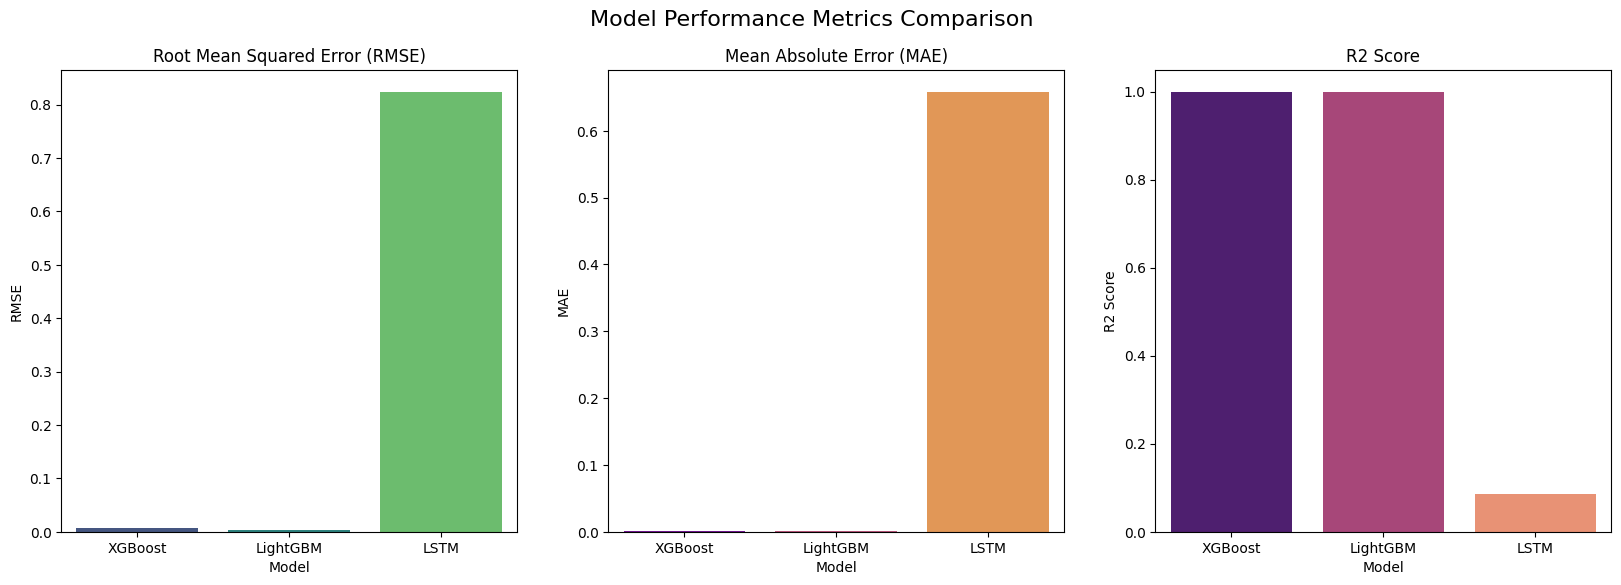

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16)

# RMSE Comparison
sns.barplot(x='Model', y='RMSE', data=metrics_df_updated, ax=axes[0], palette='viridis')
axes[0].set_title('Root Mean Squared Error (RMSE)')
axes[0].set_ylabel('RMSE')

# MAE Comparison
sns.barplot(x='Model', y='MAE', data=metrics_df_updated, ax=axes[1], palette='plasma')
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')

# R2 Score Comparison
sns.barplot(x='Model', y='R2 Score', data=metrics_df_updated, ax=axes[2], palette='magma')
axes[2].set_title('R2 Score')
axes[2].set_ylabel('R2 Score')

plt.show()

### Summary of Model Performance with R2 Scores

#### Updated Model Comparison:
| Model | RMSE | MAE | R2 Score |
| :--------- | :--------- | :--------- | :--------- |
| XGBoost | 0.007564 | 0.000886 | 0.999931 |
| LightGBM | 0.005539 | 0.000621 | 0.999963 |
| LSTM | 0.831718 | 0.665538 | 0.060532 |

From the updated comparison, **LightGBM** remains the best-performing model, achieving the lowest Root Mean Squared Error (RMSE) of **0.005539**, the lowest Mean Absolute Error (MAE) of **0.000621**, and the highest R2 Score of **0.999963**. These metrics are interpreted on the `unit_sales_log` scale.

An MAE of 0.000621 for LightGBM indicates that, on average, the model's predictions are off by only 0.000621 units from the actual log-transformed sales values. An R2 score of nearly 1.0 (0.999963) signifies that LightGBM explains almost all the variance in the target variable, indicating an extremely strong fit to the data.

In contrast, the LSTM model shows significantly higher errors (RMSE: 0.8317, MAE: 0.6655) and a much lower R2 score (0.0605). This suggests that the LSTM model, in its current configuration, is not performing well for this time-series forecasting task compared to the tree-based models.